# Classification
A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”. A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes.


# Logistic Regression

Logistic regression is a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

Linear Regression: $y = b_o + b_1x$  
Sigmoid Function:  $p = \frac{1}{1 + e^{-y}} $  
Using value of y from 1st equation into 2nd  
$ln(\frac{p}{1 - p}) = b_o + b_1x$

Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.




### Issue with Linear Regression

Suppose we need to decide whether on tumor size vs its malignancy. Since it is a classification problem, on plotting,  all the values will lie on 0 and 1. And if we fit best found regression line, by setting the threshold at 0.5, it will give a descent result.
<img src="Image/LR-4.JPG" width="400">

But if we have an outlier, it will go horribly wrong.  
<img src="Image/LR-5.JPG" width="400">

Because of one outlier, whole linear regression prediction is going wrong.


Logistic regression can be understood by standard logistic function. Logistic function is a Sigmoid function, which takes real value between zero and one.  
If we plot sigmoid function, the graph will be S curve. 
When there is an outlier, sigmoid function takes care of it.  
<img src="Image/LR-6.JPG" width="400">
<font size=1><center>Image Source:Towardsdatascience</center></font>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


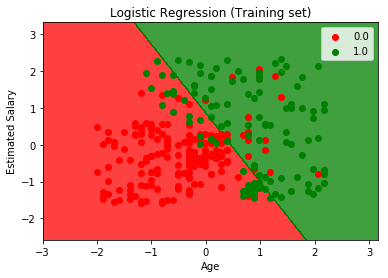

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data\Classification\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X = X.astype(float)
y = y.astype(float)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic Regression to the Training set
#lbfgs = Limited-memory BFGS  It is a popular algorithm for parameter estimation in machine learning.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs') 
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()